# Example for running MDF on an SBtab with pre-defined $\Delta G_r'^\circ$ values

In [1]:
from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway import ThermodynamicModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from sbtab import SBtab

plt.style.use("seaborn-dark")

In [2]:
comp_contrib = ComponentContribution()

In [3]:
sbtabdoc = SBtab.read_csv(
    "fermentation_pathway_with_dgs.tsv", document_name="fermentation"
)
thermo_sbtab = sbtabdoc.get_sbtab_by_id("Thermodynamics")
print(
    "Standard concentration = 1",
    thermo_sbtab.get_attribute("StandardConcentration"),
)
display(thermo_sbtab.to_data_frame())

Standard concentration = 1 M


QuantityType Reaction Compound   Value    Unit
0   reaction gibbs energy   R00000            -20.4  kJ/mol
1   reaction gibbs energy   R00001             6.99  kJ/mol
2   reaction gibbs energy   R00002           -21.05  kJ/mol
3   reaction gibbs energy   R00003            22.05  kJ/mol
4   reaction gibbs energy   R00004             5.62  kJ/mol
5   reaction gibbs energy   R00005            -1.83  kJ/mol
6   reaction gibbs energy   R00006           -16.56  kJ/mol
7   reaction gibbs energy   R00007             4.47  kJ/mol
8   reaction gibbs energy   R00008            -3.81  kJ/mol
9   reaction gibbs energy   R00009           -25.03  kJ/mol
10  reaction gibbs energy   R00010           -13.55  kJ/mol
11  reaction gibbs energy   R00011           -18.06  kJ/mol

/home/eladn/git/equilibrator-pathway/venv/lib/python3.9/site-packages/equilibrator_api/phased_reaction.py:116: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  return pd.DataFrame.from_dict(
/home/eladn/git/equilibrator-pathway/venv/lib/python3.9/site-packages/equilibrator_api/phased_reaction.py:116: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  return pd.DataFrame.from_dict(
/home/eladn/git/equilibrator-pathway/venv/lib/python3.9/site-packages/equilibrator_api/phased_reaction.py:116: FutureWarning: In a fut

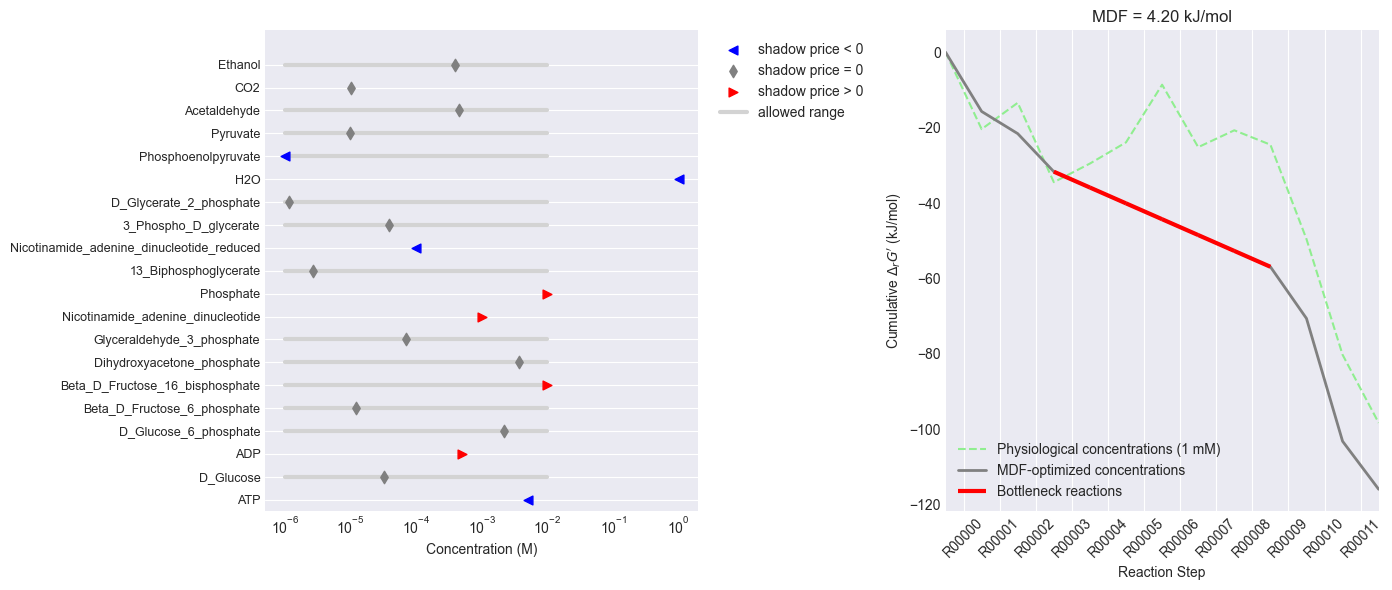

In [4]:
pp = ThermodynamicModel.from_sbtab(sbtabdoc, comp_contrib=comp_contrib)
mdf_sol = pp.mdf_analysis()

fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
ax = axs[0]
mdf_sol.plot_concentrations(ax=ax)
ax.axes.yaxis.grid(True, which="major")

ax = axs[1]
mdf_sol.plot_driving_forces(ax=ax)
ax.axes.xaxis.grid(True, which="major")
fig.tight_layout()